# Downloading the Dataset

In [1]:
# Installing required packages (only run once if not installed)
# %pip install kagglehub
# %pip install pandas
# %pip install openpyxl   

In [2]:
# Importing necessary libraries
import pandas as pd       # parse CSV data / explore data
import kagglehub          # download dataset CSVs
import os                 # create CSV paths and handle filesystem

In [3]:
# Download latest version
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\m\.cache\kagglehub\datasets\hmavrodiev\london-bike-sharing-dataset\versions\1


In [4]:
# Get the CSV filename : full path(s) from KaggleHub dataset folder path
def find_csv_files(path):
    csv_paths = {}

    for root, _, files in os.walk(path):
        for f in files:
            if f.lower().endswith(".csv"):
                if f not in csv_paths:
                    csv_paths[f] = []
                csv_paths[f].append(os.path.join(root, f))

    if not csv_paths:
        raise FileNotFoundError(f"No .csv files found in dataset")

    return csv_paths

csv_paths = find_csv_files(path)
print(csv_paths)

{'london_merged.csv': ['C:\\Users\\m\\.cache\\kagglehub\\datasets\\hmavrodiev\\london-bike-sharing-dataset\\versions\\1\\london_merged.csv']}


# Exploring the Dataset
(objectives? why are we exploring / pulling specific aspects, what do we want to know about the dataset before proceeding)

In [5]:
# Read in CSV file as pandas dataframe
bikes = pd.read_csv(csv_paths['london_merged.csv'][0])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# Show dataset
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [7]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [8]:
# count the unique values in the season column
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [9]:
# Renaming the columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [10]:
# changing humidity balues to percentages
bikes.humidity_percent = bikes.humidity_percent / 100

In [11]:
# creating a season dictionary to map the integers to seasons
season_dict = {
    '0.0':'Spring',
    '1.0':'Summer',
    '2.0':'Autumn',
    '3.0':'Winter'
}

# creating a weather dictionary to map the weather_code to weather states
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [12]:
# convert to datetime (do this ONCE)
bikes['time'] = pd.to_datetime(bikes['time'])

# time-based features
bikes['year'] = bikes['time'].dt.year
bikes['month'] = bikes['time'].dt.month
bikes['month_name'] = bikes['time'].dt.month_name()

bikes['day'] = bikes['time'].dt.day
bikes['dayofweek'] = bikes['time'].dt.dayofweek      # 0=Mon, 6=Sun
bikes['day_name'] = bikes['time'].dt.day_name()

bikes['hour'] = bikes['time'].dt.hour

In [13]:
# checking our dataframe to see the additions to table
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month,month_name,day,dayofweek,day_name,hour
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,Winter,2015,1,January,4,6,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,19
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,20
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,21
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,22


# VISUALIZING THE DATASET

In [157]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

## Temporal Data

### Bike Shares by Seasons

C:\Users\m\AppData\Local\Temp\ipykernel_19716\2970236101.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


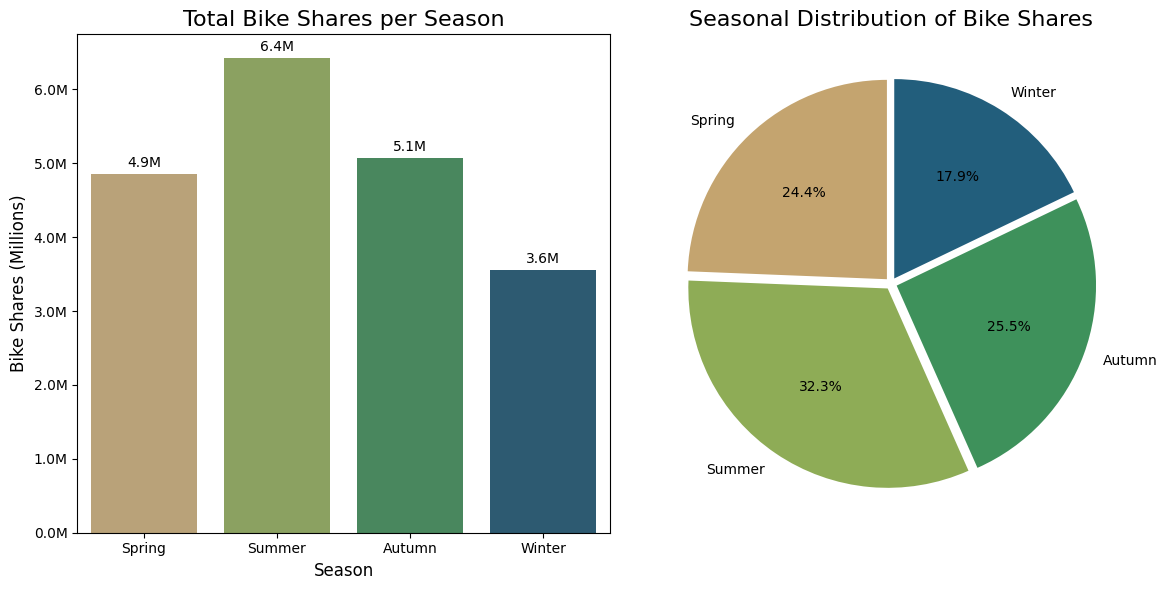

In [75]:
season_order = ['Spring', 'Summer', 'Autumn', 'Winter'] # 0 = Spring - 3 = Winter
bikes['season'] = pd.Categorical(bikes['season'], categories=season_order, ordered=True)
season_counts = bikes.groupby('season', observed=False)['count'].sum()

# Color palette (consistent across plots)
# colors= sns.cubehelix_palette(as_cmap=True)
colors = sns.color_palette("gist_earth_r", n_colors=len(season_counts))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# =====================
# Bar Chart (Left)
# =====================
bars = sns.barplot(
    x=season_counts.index,
    y=season_counts.values,
    palette=colors,
    ax=axes[0]
)

axes[0].set_title("Total Bike Shares per Season", fontsize=16)
axes[0].set_xlabel("Season", fontsize=12)
axes[0].set_ylabel("Bike Shares (Millions)", fontsize=12)

# Format y-axis to millions
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    axes[0].annotate(
        f'{height/1e6:.1f}M',
        (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10
    )

# =====================
# Pie Chart (Right)
# =====================
axes[1].pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=[0.03] * len(season_counts),
    startangle=90
)

axes[1].set_title("Seasonal Distribution of Bike Shares", fontsize=16)

plt.tight_layout()
plt.show()

### Bike Shares by Months

C:\Users\m\AppData\Local\Temp\ipykernel_19716\77999432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


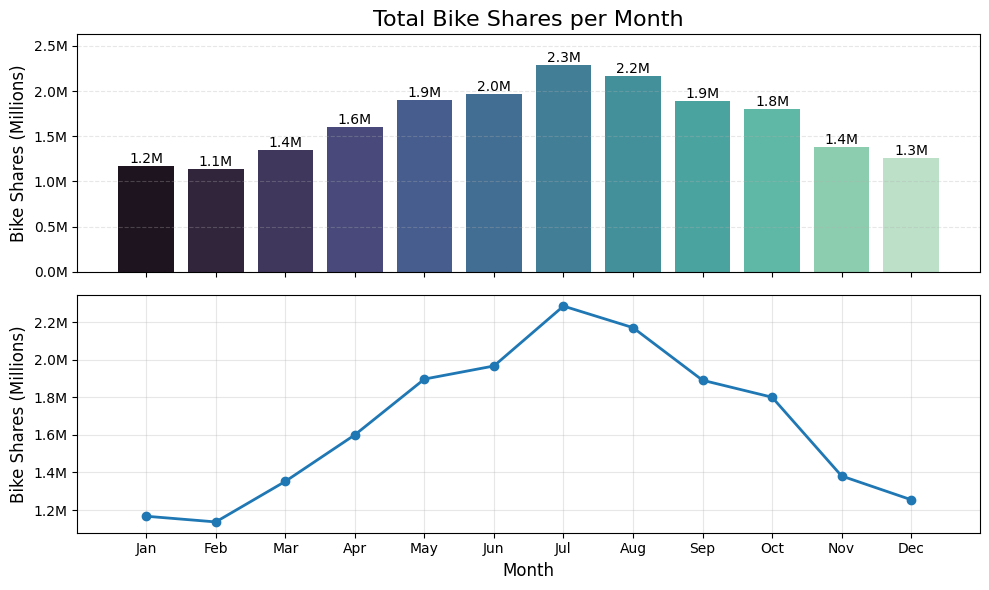

In [ ]:
# Map month numbers to short names
month_map = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',  'Sep',  'Oct',  'Nov', 'Dec']

# Pre-aggregate total bike shares per month
month_counts = bikes.groupby('month', observed=True)['count'].sum().sort_index()

# Create stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

# ---------------------------
# Bar Chart
# ---------------------------
bars = sns.barplot(
    x=month_map,
    y=month_counts.values,
    ax=axes[0],
    palette="mako",
    errorbar=None
)

axes[0].set_title("Total Bike Shares per Month", fontsize=16)
axes[0].set_ylabel("Bike Shares (Millions)", fontsize=12)

axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

# Add headroom for labels
max_val = month_counts.max()
axes[0].set_ylim(0, max_val * 1.15)

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    axes[0].annotate(
        f'{height/1e6:.1f}M',
        (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10
    )

axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# ---------------------------
# Line Chart
# ---------------------------
axes[1].plot(
    month_map,
    month_counts.values,
    marker='o',
    linewidth=2,
    markersize=6
)

#axes[1].set_title("Total Bike Shares per Month (Line Trend)", fontsize=16)
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Bike Shares (Millions)", fontsize=12)

axes[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Bike Shares per Day of Month

C:\Users\m\AppData\Local\Temp\ipykernel_19716\2681487761.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


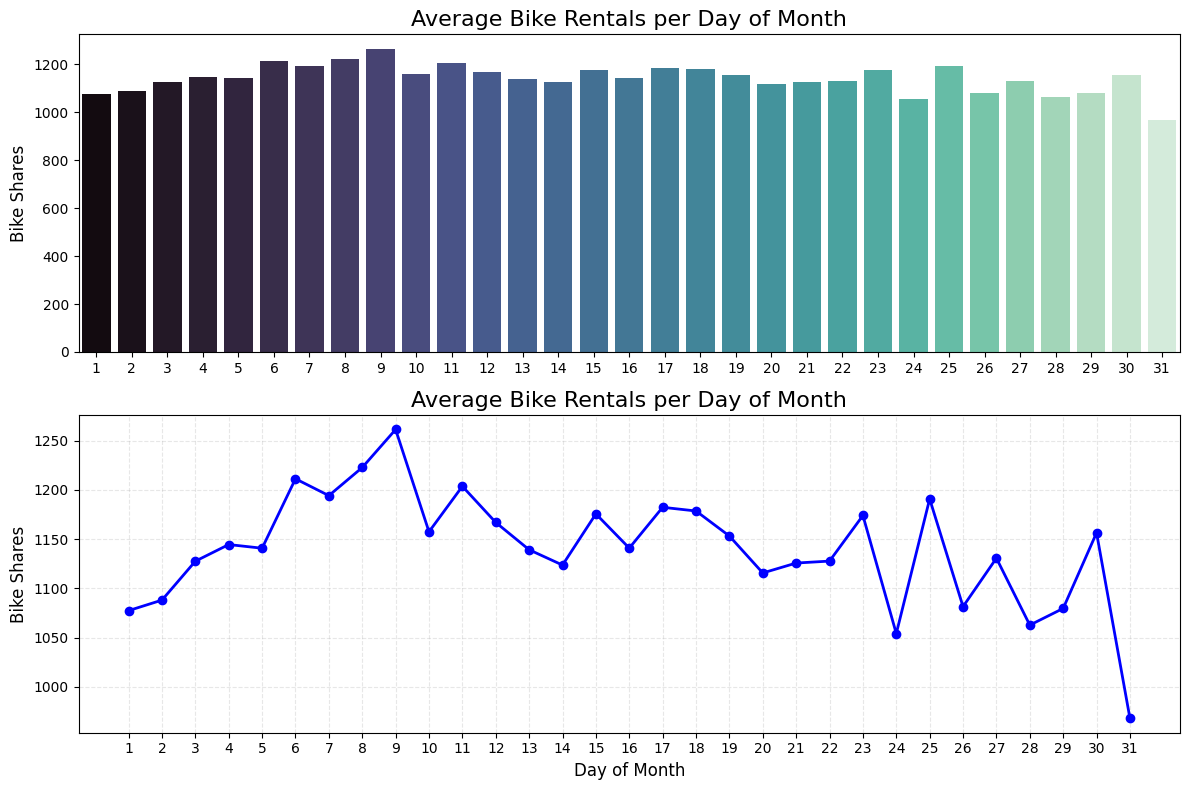

In [ ]:
# Pre-aggregate total bike shares per day
day_counts = bikes.groupby('day', observed=False)['count'].mean()

# Create stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# ---------------------------
# 1. Bar Chart (Top)
# ---------------------------
# Use numeric positions for perfect alignment
x_positions = range(len(day_counts.index))

sns.barplot(
    x=x_positions,
    y=day_counts.values,
    ax=axes[0],
    palette="mako",
    hue=x_positions,
    errorbar=None
)

axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(day_counts.index)
axes[0].set_title("Average Bike Rentals per Day of Month", fontsize=16)
axes[0].set_ylabel("Bike Shares", fontsize=12)

# ---------------------------
# 2. Line Chart (Bottom)
# ---------------------------
axes[1].plot(
    x_positions,
    day_counts.values,
    marker='o',
    linewidth=2,
    markersize=6,
    color='blue'
)

axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(day_counts.index)
axes[1].set_title("Average Bike Rentals per Day of Month", fontsize=16)
axes[1].set_xlabel("Day of Month", fontsize=12)
axes[1].set_ylabel("Bike Shares", fontsize=12)
axes[1].grid(alpha=0.3, linestyle='--')  # Add gridlines (both x and y)

plt.tight_layout()
plt.show()

### Bike Shares by Weekday

C:\Users\m\AppData\Local\Temp\ipykernel_19716\1981355045.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\m\AppData\Local\Temp\ipykernel_19716\1981355045.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


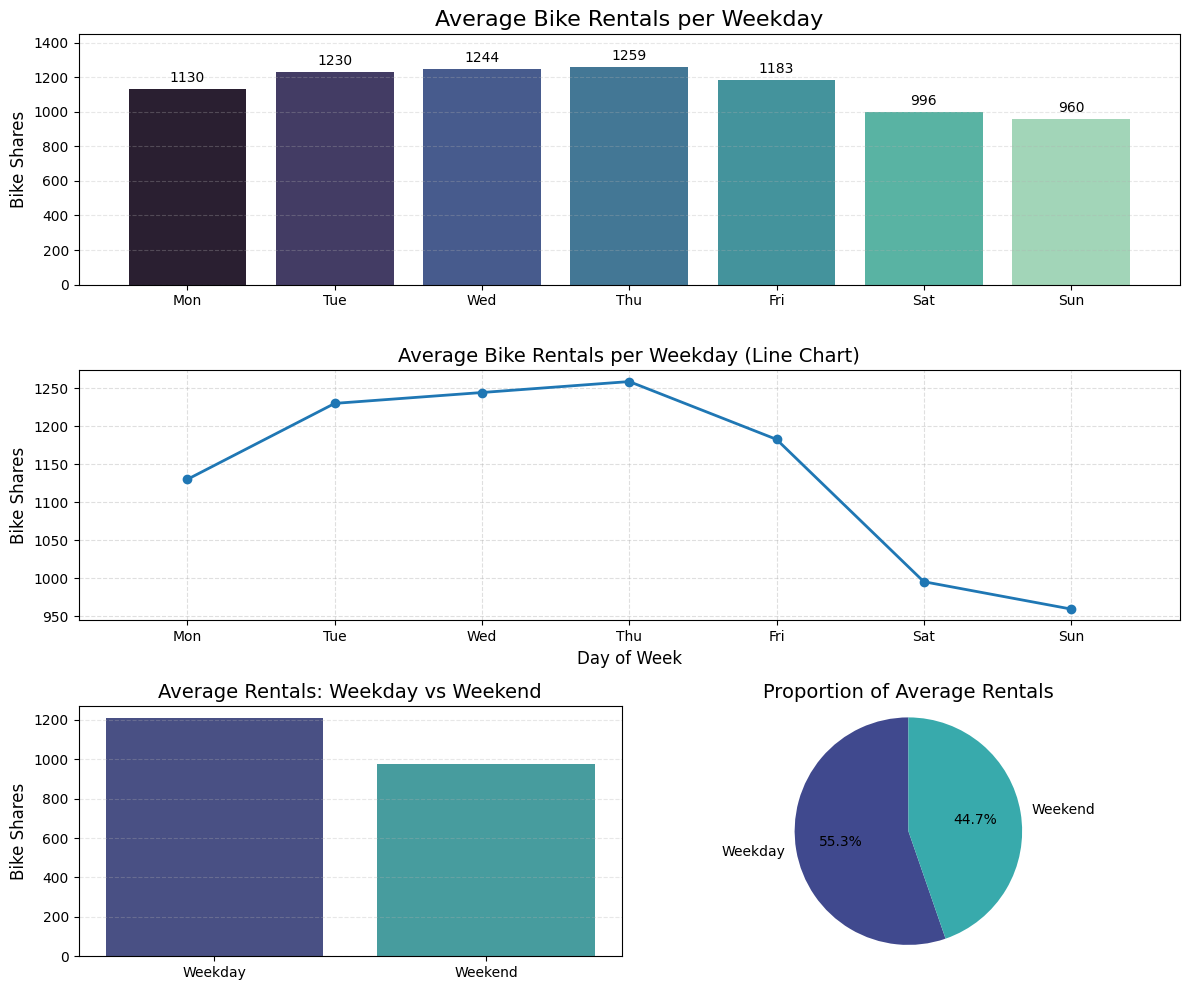

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

weekday_map = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']  # 0 = Mon, 6 = Sun
weekday_counts = bikes.groupby('dayofweek', observed=False)['count'].mean()

# Aggregate weekend data
weekend_counts = bikes.groupby('is_weekend', observed=False)['count'].mean()
weekend_labels = ['Weekday', 'Weekend']

# Create figure with GridSpec
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])

# ---------------------------
# 1. Weekday Bar Chart (Top)
# ---------------------------
ax1 = fig.add_subplot(gs[0, :])

sns.barplot(
    x=weekday_map,
    y=weekday_counts.values,
    palette="mako",
    errorbar=None,
    ax=ax1
)

ax1.set_title("Average Bike Rentals per Weekday", fontsize=16)
ax1.set_ylabel("Bike Shares", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Add headroom
max_val = weekday_counts.max()
ax1.set_ylim(0, max_val * 1.15)

# Add value labels
for bar in ax1.patches:
    height = bar.get_height()
    ax1.annotate(
        f'{height:.0f}',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 3),
        textcoords='offset points'
    )

# ---------------------------
# 2. Weekday Line Chart (Middle)
# ---------------------------
ax2 = fig.add_subplot(gs[1, :], sharex=ax1)

ax2.plot(
    weekday_map,
    weekday_counts.values,
    marker='o',
    linewidth=2
)

ax2.set_title("Average Bike Rentals per Weekday (Line Chart)", fontsize=14)
ax2.set_xlabel("Day of Week", fontsize=12)
ax2.set_ylabel("Bike Shares", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.4)

# ---------------------------
# 3. is_weekend Bar Chart (Bottom Left)
# ---------------------------
ax3 = fig.add_subplot(gs[2, 0])

sns.barplot(
    x=weekend_labels,
    y=weekend_counts.values,
    palette="mako",
    errorbar=None,
    ax=ax3
)

ax3.set_title("Average Rentals: Weekday vs Weekend", fontsize=14)
ax3.set_ylabel("Bike Shares", fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.3)

# ---------------------------
# 4. is_weekend Pie Chart (Bottom Right)
# ---------------------------
ax4 = fig.add_subplot(gs[2, 1])

ax4.pie(
    weekend_counts.values,
    labels=weekend_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("mako", 2)
)

ax4.set_title("Proportion of Average Rentals", fontsize=14)
ax4.axis('equal')  # keep pie circular

plt.tight_layout()
plt.show()

### Bikes Hourly

C:\Users\m\AppData\Local\Temp\ipykernel_19716\110392657.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


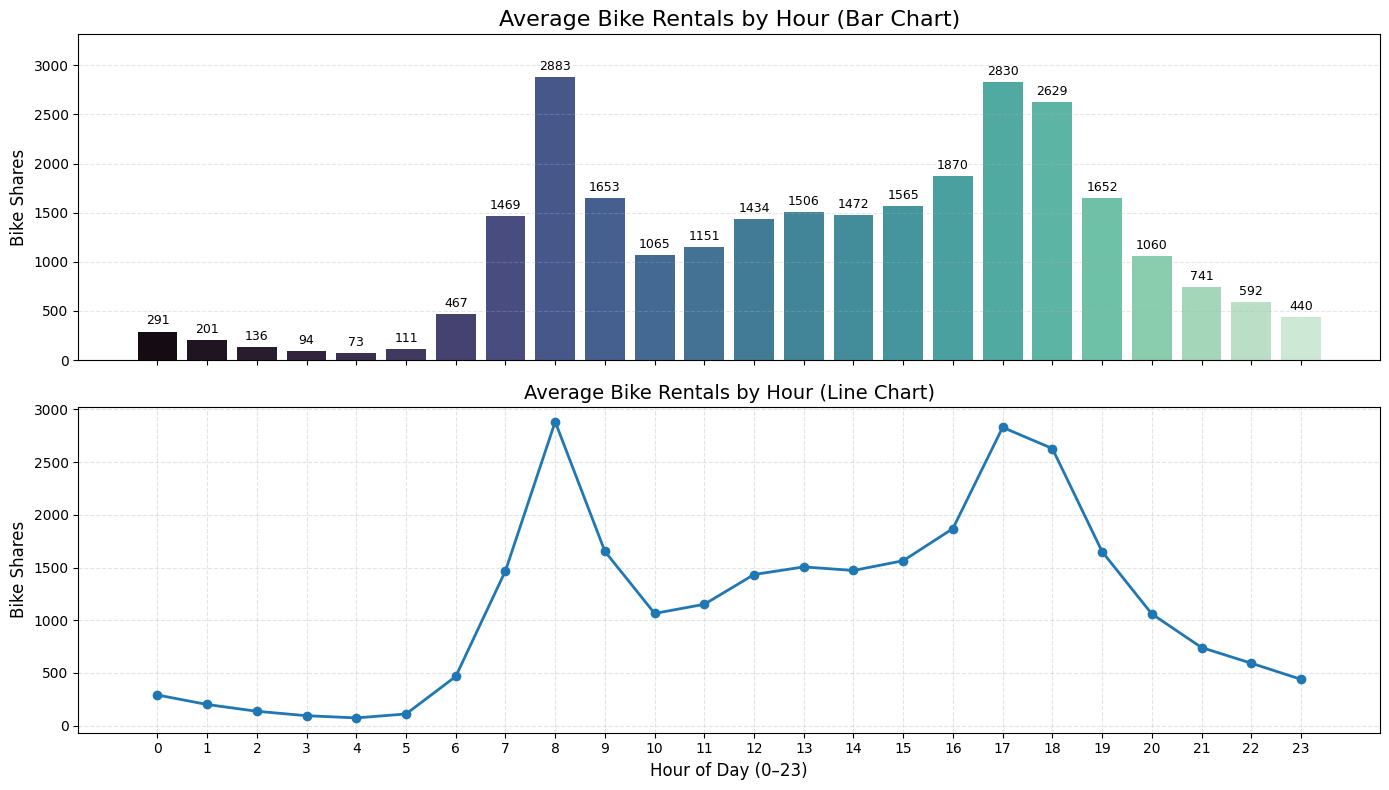

In [148]:
# Prepare hourly aggregated data (0..23). Reindex ensures all hours are present in order.
hours = list(range(24))
hour_counts = bikes.groupby('hour', observed=False)['count'].mean() # .reindex(hours, fill_value=0)

# Numeric positions so seaborn and matplotlib align perfectly
x_positions = range(len(hours))

fig, axes = plt.subplots(2, 1, figsize=(14,8), sharex=True)

# ---------------------------
# 1) Bar chart (top)
# ---------------------------
sns.barplot(
    x=x_positions,
    y=hour_counts.values,
    palette="mako",
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Average Bike Rentals by Hour (Bar Chart)", fontsize=16)
axes[0].set_ylabel("Bike Shares", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# Add headroom so labels won't be clipped
max_val = hour_counts.max()
axes[0].set_ylim(0, max_val * 1.15 if max_val > 0 else 1)

# Annotate bars with values
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(
        f'{height:.0f}',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

# ---------------------------
# 2) Line chart (bottom)
# ---------------------------
axes[1].plot(
    x_positions,
    hour_counts.values,
    marker='o',
    linewidth=2
)

axes[1].set_title("Average Bike Rentals by Hour (Line Chart)", fontsize=14)
axes[1].set_xlabel("Hour of Day (0–23)", fontsize=12)
axes[1].set_ylabel("Bike Shares", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.35)

# Make x ticks show the hour numbers
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(hours)
plt.tight_layout()
plt.show()


### Bikes Shares by Weather Category

C:\Users\m\AppData\Local\Temp\ipykernel_19716\1464943117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_total = bikes.groupby('weather')['count'].sum()
C:\Users\m\AppData\Local\Temp\ipykernel_19716\1464943117.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg = bikes.groupby('weather')['count'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_19716\1464943117.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_total = sns.barplot(
C:\Users\m\A

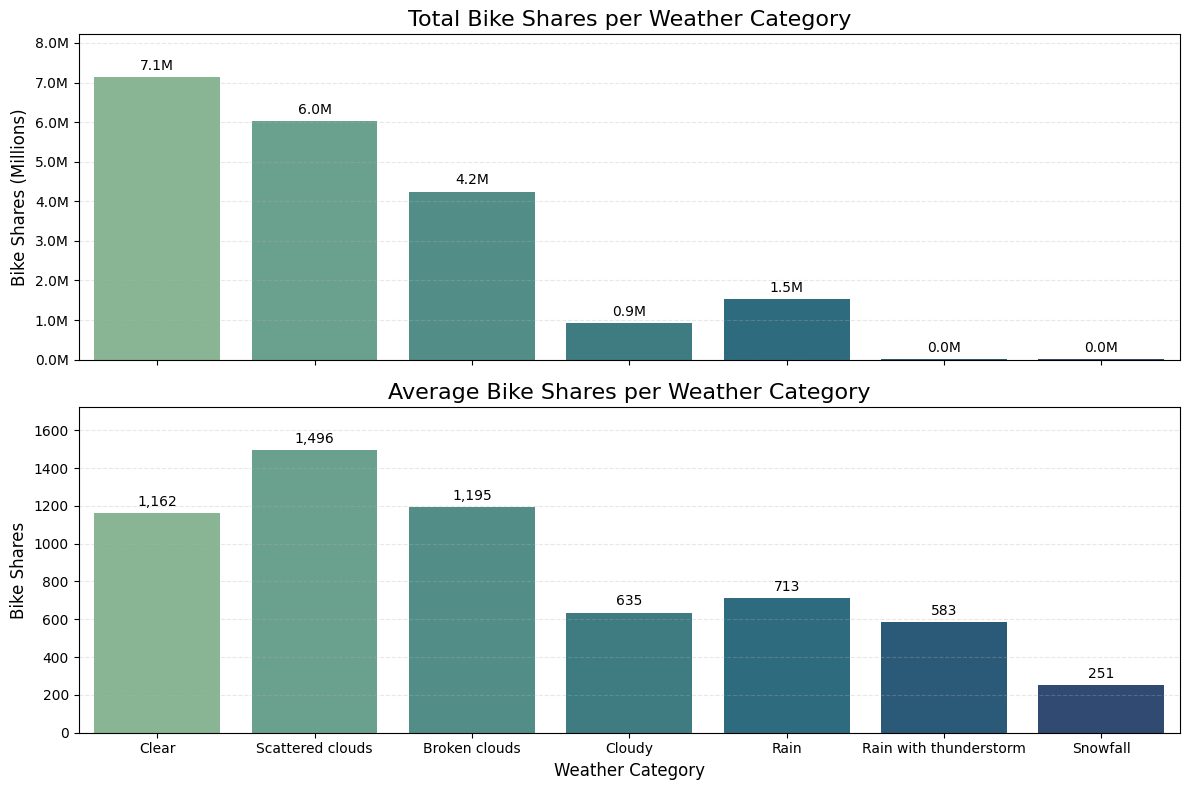

In [155]:
# Aggregate data
weather_total = bikes.groupby('weather')['count'].sum()
weather_avg = bikes.groupby('weather')['count'].mean()

# Create stacked subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

# ---------------------------
# 1) Total Bike Shares (Top)
# ---------------------------
bars_total = sns.barplot(
    x=weather_total.index,
    y=weather_total.values,
    palette='crest',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Total Bike Shares per Weather Category", fontsize=16)
axes[0].set_ylabel("Bike Shares (Millions)", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# Format y-axis in millions
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

# Add headroom
axes[0].set_ylim(0, weather_total.max() * 1.15)

# Annotate bars
for bar in bars_total.patches:
    height = bar.get_height()
    axes[0].annotate(
        f'{height/1e6:.1f}M',
        (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

# ---------------------------
# 2) Average Bike Shares (Bottom)
# ---------------------------
bars_avg = sns.barplot(
    x=weather_avg.index,
    y=weather_avg.values,
    palette='crest',
    errorbar=None,
    ax=axes[1]
)

axes[1].set_title("Average Bike Shares per Weather Category", fontsize=16)
axes[1].set_xlabel("Weather Category", fontsize=12)
axes[1].set_ylabel("Bike Shares", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Add headroom
axes[1].set_ylim(0, weather_avg.max() * 1.15)

# Annotate bars
for bar in bars_avg.patches:
    height = bar.get_height()
    axes[1].annotate(
        f'{height:,.0f}',
        (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## Correlation between bike rentals and humidity, temperature, and wind speed.
For the following graphs, I use a binned scatterplot to show the relationships. This is because not all of the relationships are linear or smooth, scatterplots show the variability. Binned because the data size is very large, showing all inputs would make it harder to interpret the data visually. There are not clearly defined categories so using bar graphs wouldn't be ideal.

### Rentals vs Temperature

C:\Users\m\AppData\Local\Temp\ipykernel_19716\3910620965.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby(pd.cut(bikes[var], bins=bin_edges))['count'].mean()


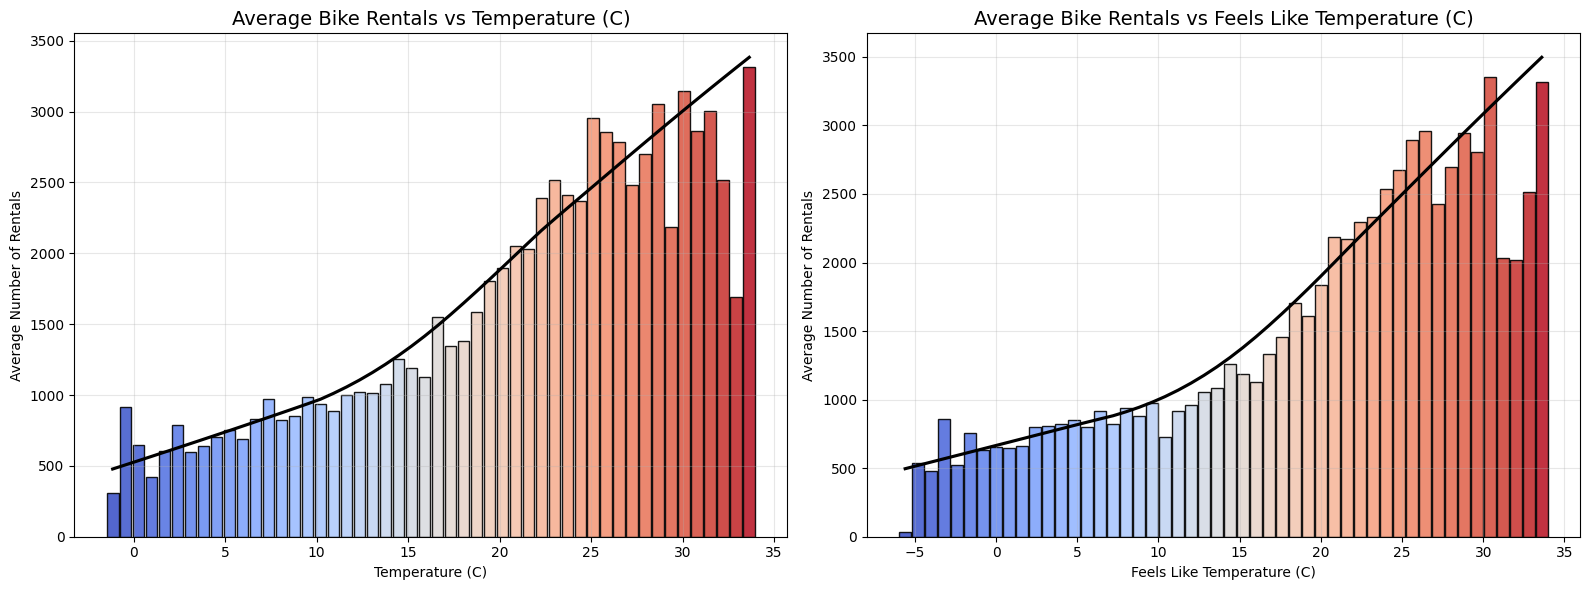

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of temperature variables and labels
temp_vars = ['temp_real_C', 'temp_feels_like_C']
labels = ['Temperature (C)', 'Feels Like Temperature (C)']

plt.figure(figsize=(16,6))

for i, (var, label) in enumerate(zip(temp_vars, labels), 1):
    plt.subplot(1, 2, i)
    
    # Create bins
    bins = 50
    bin_edges = np.linspace(bikes[var].min(), bikes[var].max(), bins + 1)
    
    # Compute average rentals per bin
    binned_avg = bikes.groupby(pd.cut(bikes[var], bins=bin_edges))['count'].mean()
    
    # Create a color palette based on temperature (blue → red)
    colors = sns.color_palette("coolwarm", n_colors=len(binned_avg))
    
    # Histogram-style bar plot
    plt.bar(
        [interval.mid for interval in binned_avg.index],
        binned_avg.values,
        width=(bin_edges[1] - bin_edges[0])*0.9,  # slight spacing
        color=colors,
        edgecolor='black',
        alpha=0.9
    )
    
    # Optional: smooth trend line
    sns.regplot(
        x=[interval.mid for interval in binned_avg.index],
        y=binned_avg.values,
        scatter=False,
        color='black',
        lowess=True
    )
    
    plt.title(f"Average Bike Rentals vs {label}", fontsize=14)
    plt.xlabel(label)
    plt.ylabel("Average Number of Rentals")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

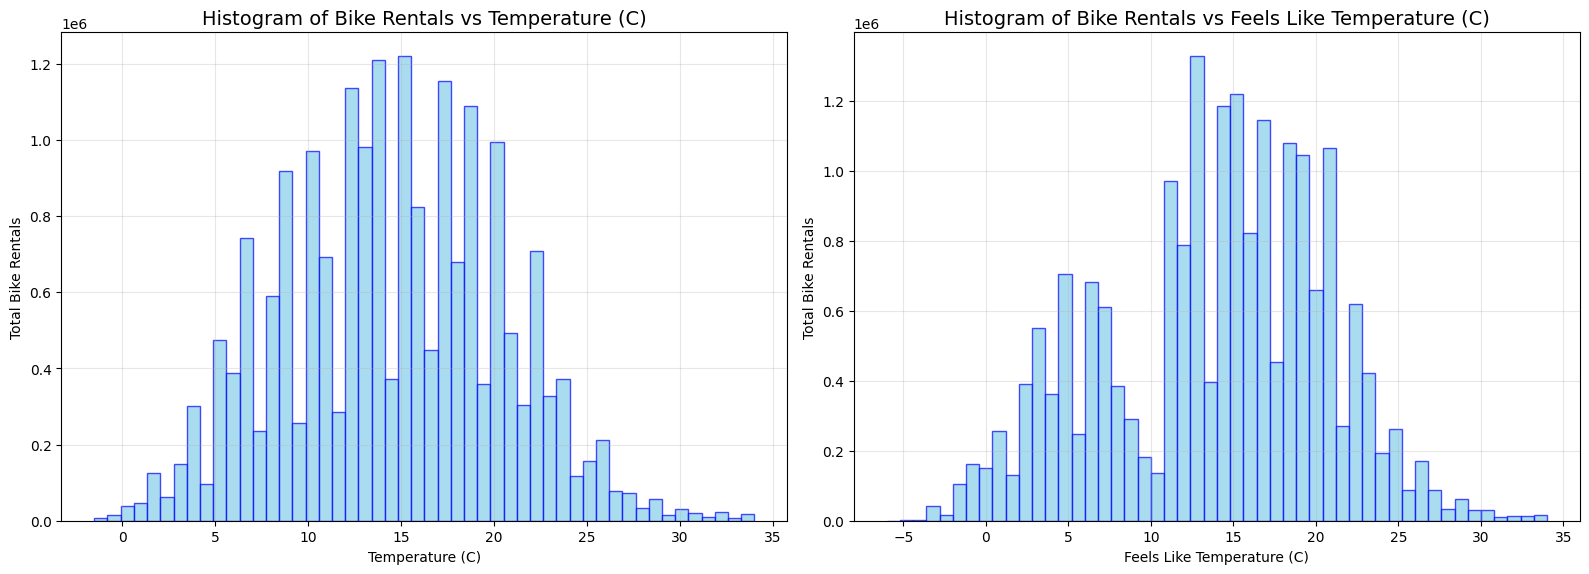

In [159]:
import matplotlib.pyplot as plt

# List of temperature variables and labels
temp_vars = ['temp_real_C', 'temp_feels_like_C']
labels = ['Temperature (C)', 'Feels Like Temperature (C)']

plt.figure(figsize=(16,6))

for i, (var, label) in enumerate(zip(temp_vars, labels), 1):
    plt.subplot(1, 2, i)
    
    # Histogram of bike counts for each temperature variable
    plt.hist(
        bikes[var],
        bins=50,
        weights=bikes['count'],  # weight by bike counts to reflect usage
        color='skyblue',
        edgecolor='blue',
        alpha=0.7
    )
    
    plt.title(f"Histogram of Bike Rentals vs {label}", fontsize=14)
    plt.xlabel(label)
    plt.ylabel("Total Bike Rentals")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_19716\3597858488.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby(pd.cut(bikes[var], bins=50))['count'].mean()


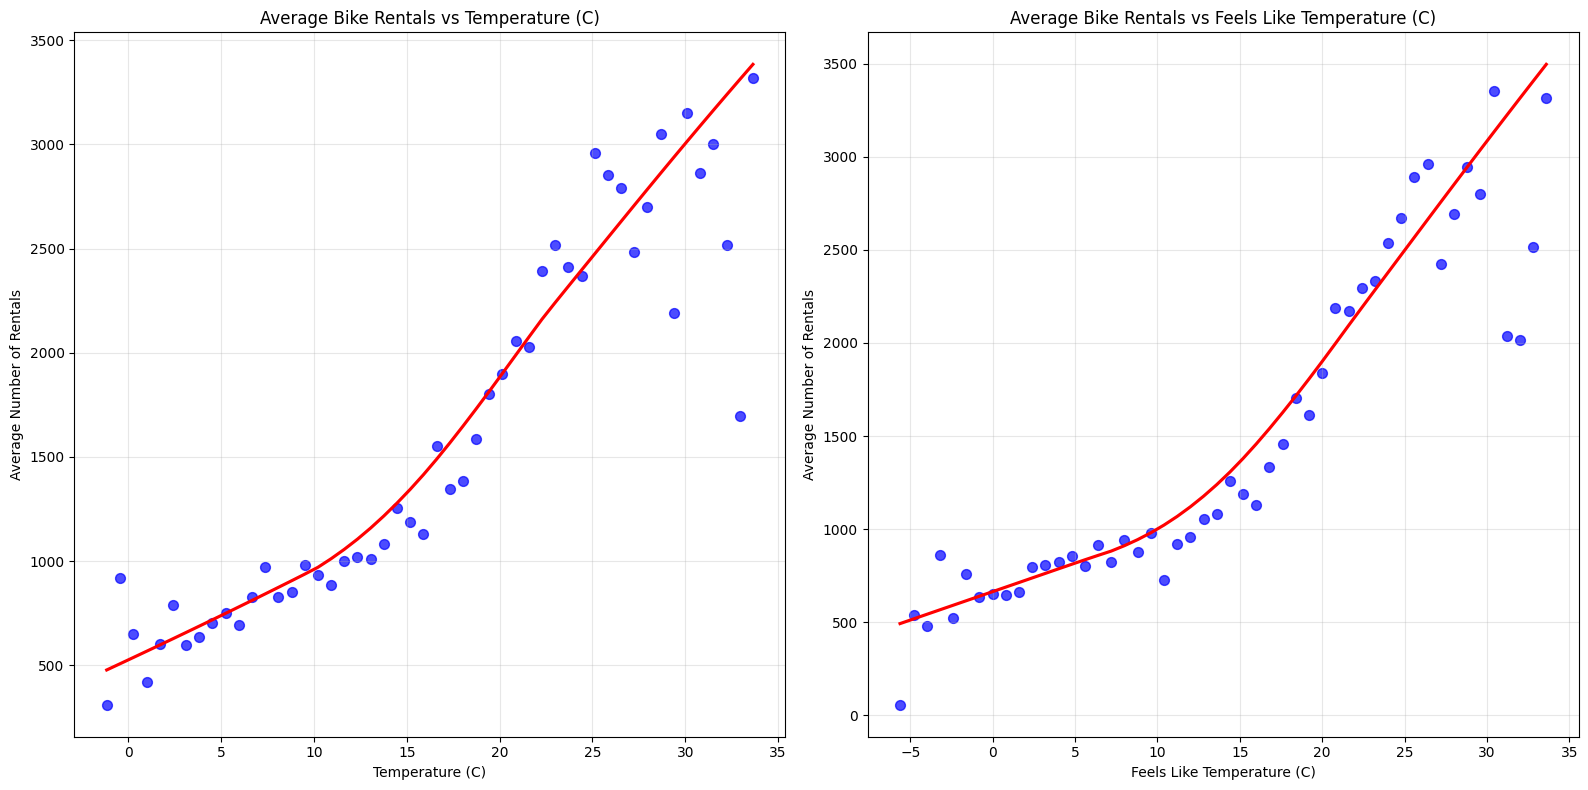

In [24]:
# List of temperature variables and labels
temp_vars = ['temp_real_C', 'temp_feels_like_C']
labels = ['Temperature (C)', 'Feels Like Temperature (C)']

plt.figure(figsize=(16,8))

for i, (var, label) in enumerate(zip(temp_vars, labels), 1):
    # Create bins and compute averages
    binned_avg = bikes.groupby(pd.cut(bikes[var], bins=50))['count'].mean()
    bin_centers = [interval.mid for interval in binned_avg.index]
    
    # Plot
    plt.subplot(1, 2, i)
    plt.scatter(bin_centers, binned_avg.values, s=50, alpha=0.7, color='blue')
    sns.regplot(x=bin_centers, y=binned_avg.values, scatter=False, color='red', lowess=True)

    plt.title(f"Average Bike Rentals vs {label}")
    plt.xlabel(label)
    plt.ylabel("Average Number of Rentals")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Rentals vs Humidity

C:\Users\m\AppData\Local\Temp\ipykernel_19716\4238289244.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby('humidity_bin')['count'].mean()


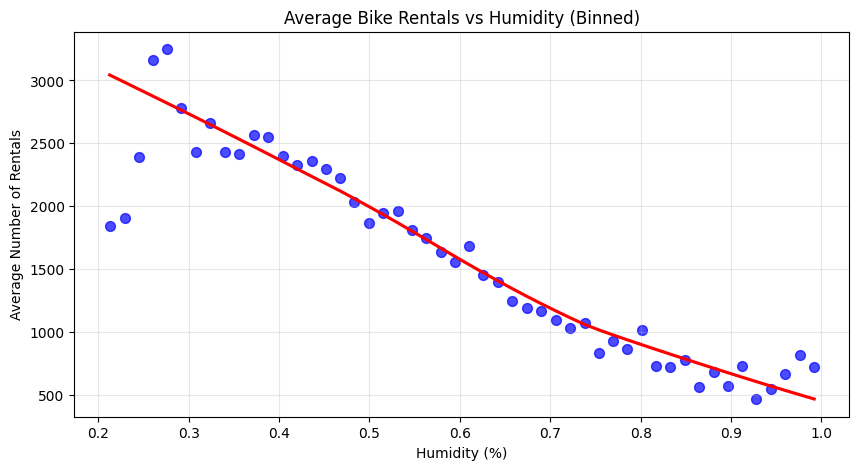

In [25]:
plt.figure(figsize=(10,5))

# Create bins for humidity
bins = 50
bikes['humidity_bin'] = pd.cut(bikes['humidity_percent'], bins=bins)

# Compute the average rentals per bin
binned_avg = bikes.groupby('humidity_bin')['count'].mean()
bin_centers = [interval.mid for interval in binned_avg.index]

# Scatter plot of binned averages
plt.scatter(bin_centers, binned_avg.values, s=50, alpha=0.7, color='blue')
sns.regplot(x=bin_centers, y=binned_avg.values, scatter=False, color='red', lowess=True)

plt.title("Average Bike Rentals vs Humidity (Binned)")
plt.xlabel("Humidity (%)")
plt.ylabel("Average Number of Rentals")
plt.grid(alpha=0.3)
plt.show()

### Rentals vs Wind Speed

C:\Users\m\AppData\Local\Temp\ipykernel_19716\426489871.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby('wind_speed_bin')['count'].mean()


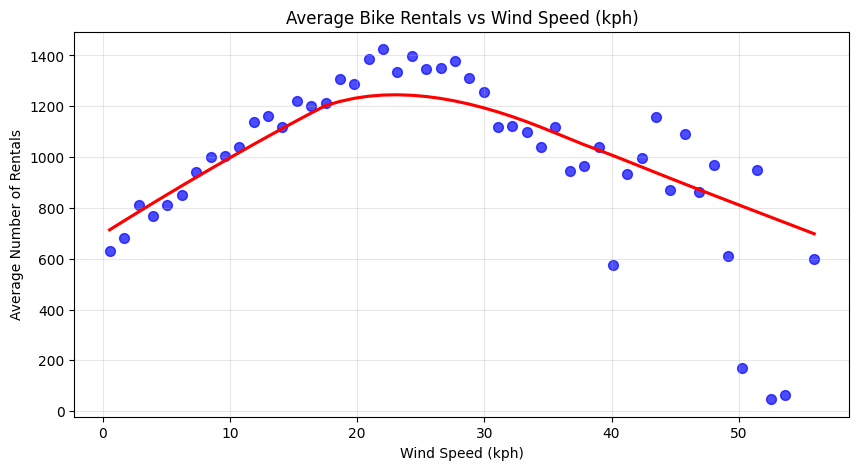

In [26]:
plt.figure(figsize=(10,5))

# Create bins for wind speed
bins = 50
bikes['wind_speed_bin'] = pd.cut(bikes['wind_speed_kph'], bins=bins)

# Compute binned averages
binned_avg = bikes.groupby('wind_speed_bin')['count'].mean()
bin_centers = [interval.mid for interval in binned_avg.index]

# Scatter plot of binned averages
plt.scatter(bin_centers, binned_avg.values, s=50, alpha=0.7, color='blue')
sns.regplot(x=bin_centers, y=binned_avg.values, scatter=False, color='red', lowess=True)

plt.title("Average Bike Rentals vs Wind Speed (kph)")
plt.xlabel("Wind Speed (kph)")
plt.ylabel("Average Number of Rentals")
plt.grid(alpha=0.3)
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_19716\3576932535.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby(f'{var}_bin')['count'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_19716\3576932535.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby(f'{var}_bin')['count'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_19716\3576932535.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

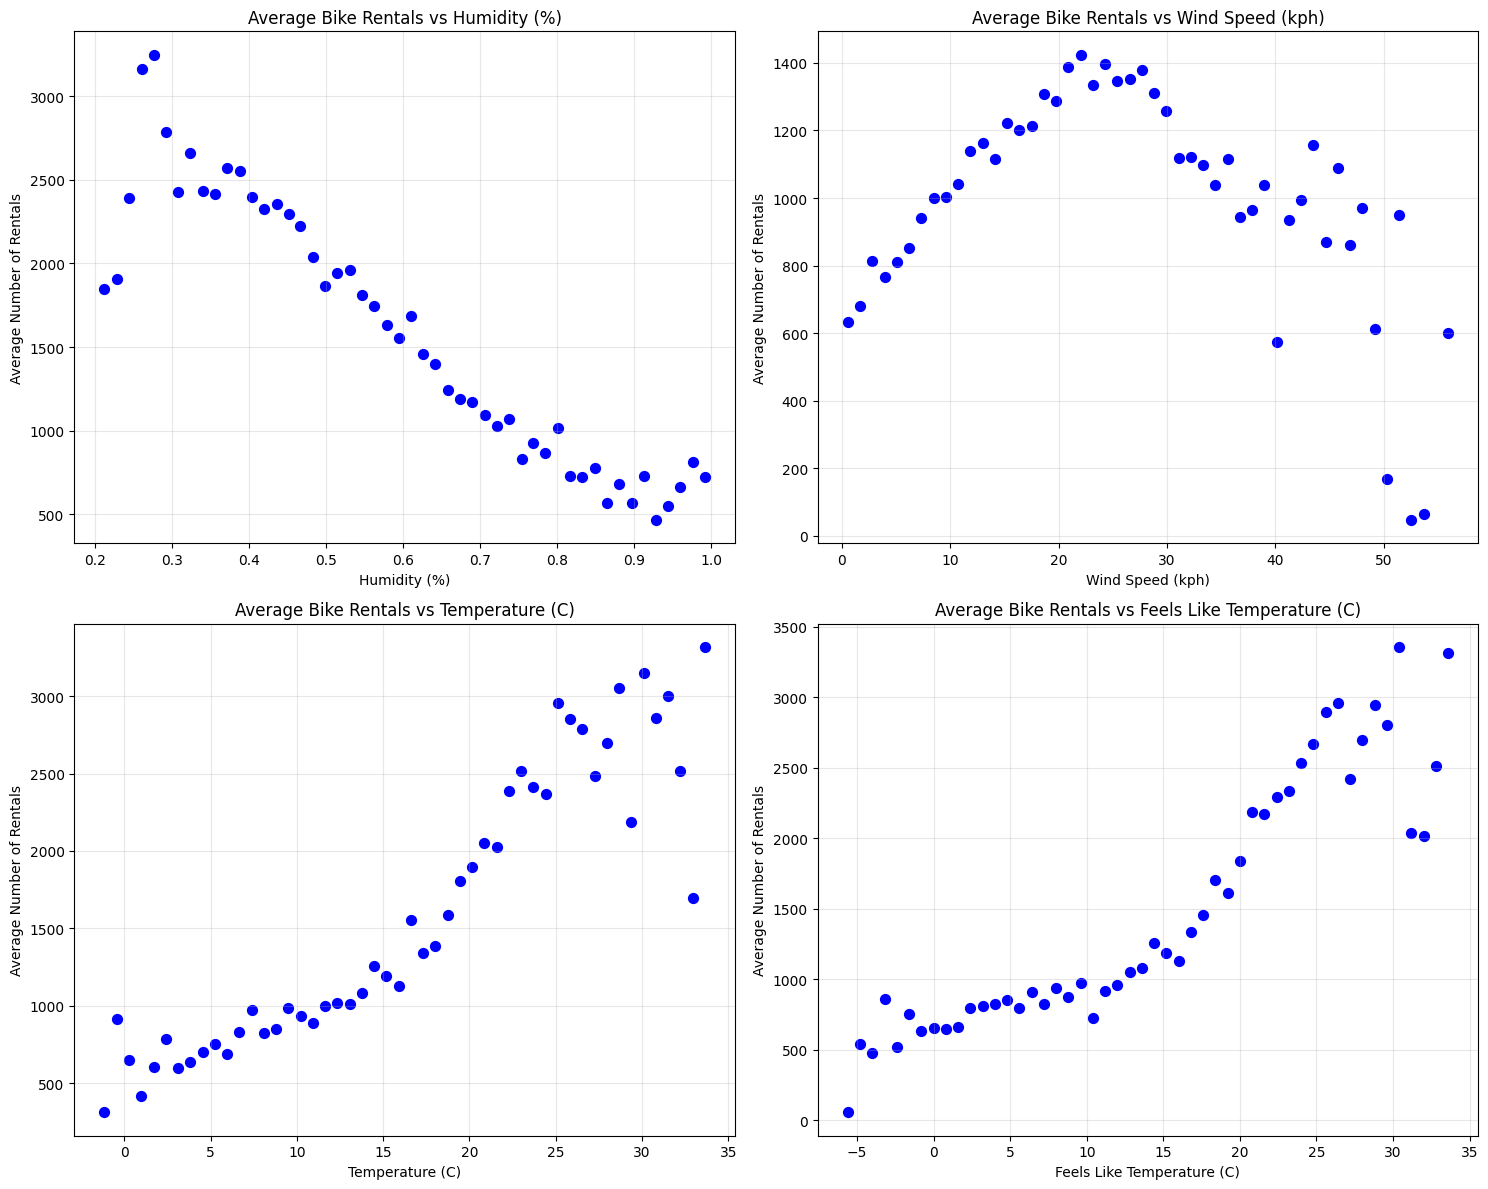

In [27]:
# List of numerical variables and titles
numeric_vars = ['humidity_percent', 'wind_speed_kph', 'temp_real_C', 'temp_feels_like_C']
titles = ['Humidity (%)', 'Wind Speed (kph)', 'Temperature (C)', 'Feels Like Temperature (C)']

plt.figure(figsize=(15,12))

for i, var in enumerate(numeric_vars, 1):
    # Create bins
    bins = 50
    bikes[f'{var}_bin'] = pd.cut(bikes[var], bins=bins)
    
    # Compute average rentals per bin
    binned_avg = bikes.groupby(f'{var}_bin')['count'].mean()
    
    # Bin centers for x-axis
    bin_centers = [interval.mid for interval in binned_avg.index]
    
    # Plot as scatter (no connecting lines)
    plt.subplot(2, 2, i)
    plt.scatter(bin_centers, binned_avg.values, s=50, color='blue')  # s=marker size
    plt.title(f"Average Bike Rentals vs {titles[i-1]}")
    plt.xlabel(titles[i-1])
    plt.ylabel("Average Number of Rentals")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [28]:
# Writing the final dataframe to an excel file that we will use in our Tableau visualisations. The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')